# July 23, 2019 3min ANN Regression
* name: Jikhan Jeong
* reference: https://github.com/jskDr/keraspp

* regression problem should have a 1 dim output and no-activation function

In [37]:
from keras import layers, models

In [38]:
class ANN(models.Model):
    def __init__(self, Nin, Nh, Nout):
        hidden = layers.Dense(Nh)    # hidden layers
        output = layers.Dense(Nout) # output layers
        relu = layers.Activation('relu') # activation function in hidden  
        
        x = layers.Input(shape=(Nin,))
        h = relu(hidden(x)) # activation function and the result go into the output layers
        y = output(h)
        
        super().__init__(x, y) # parant class initizalization
        
        self.compile(loss='mse', optimizer ='sgd')

In [22]:
from keras import datasets
from sklearn import preprocessing 

In [42]:
def Data_func():
    (X_train,y_train), (X_test, y_test) = datasets.boston_housing.load_data()
    scaler = preprocessing.MinMaxScaler() # max 1 min 0 rescale
    X_train = scaler.fit_transform(X_train)
    X_test  = scaler.transform(X_test)
    return (X_train, y_train), (X_test, y_test)

In [28]:
import matplotlib.pyplot as plt

In [29]:
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','Test'], loc=0)

Train on 323 samples, validate on 81 samples
Epoch 1/100
 - 1s - loss: 554.7731 - val_loss: 391.5547
Epoch 2/100
 - 0s - loss: 186.7907 - val_loss: 103.6698
Epoch 3/100
 - 0s - loss: 96.4123 - val_loss: 84.5078
Epoch 4/100
 - 0s - loss: 76.6629 - val_loss: 78.4461
Epoch 5/100
 - 0s - loss: 63.9306 - val_loss: 60.6887
Epoch 6/100
 - 0s - loss: 59.7411 - val_loss: 75.1251
Epoch 7/100
 - 0s - loss: 86.3436 - val_loss: 58.4090
Epoch 8/100
 - 0s - loss: 51.0445 - val_loss: 94.1469
Epoch 9/100
 - 0s - loss: 62.2763 - val_loss: 64.4279
Epoch 10/100
 - 0s - loss: 46.8340 - val_loss: 52.7741
Epoch 11/100
 - 0s - loss: 42.2346 - val_loss: 49.0472
Epoch 12/100
 - 0s - loss: 40.6376 - val_loss: 41.9872
Epoch 13/100
 - 0s - loss: 38.6054 - val_loss: 56.4938
Epoch 14/100
 - 0s - loss: 44.7323 - val_loss: 42.4003
Epoch 15/100
 - 0s - loss: 42.1393 - val_loss: 47.1285
Epoch 16/100
 - 0s - loss: 35.1406 - val_loss: 46.3851
Epoch 17/100
 - 0s - loss: 33.7621 - val_loss: 36.2513
Epoch 18/100
 - 0s - loss

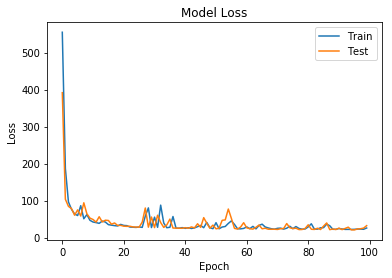

In [43]:
def main():
    Nin  = 13
    Nh   = 5
    Nout = 1
    
    model = ANN(Nin, Nh, Nout)
    (X_train, y_train), (X_test, y_test) = Data_func()
    
    history = model.fit(X_train, y_train, epochs = 100, batch_size =100, validation_split=0.2, verbose=2)
    
    performance_test = model.evaluate(X_test, y_test, batch_size=100)
    
    print(performance_test)
    
    plot_loss(history)
    plt.show()
    
    
if __name__ == '__main__':
    main()